In [1]:
from ML_BOOTCAMP import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LINEAR REGRESSION


In [20]:
data_train= pd.read_csv(r"linear_train.csv")
data_test=pd.read_csv(r"linear_test_data.csv")

In [21]:
x=np.array(data_train[data_train.columns[1:-1]])
y=np.array(data_train["label"])

for iterations=1 cost function=29526.52873486254
for iterations=51 cost function=9940.74218702937
for iterations=101 cost function=5948.623555061025
for iterations=151 cost function=5048.051190251162
for iterations=201 cost function=4836.760166237751
for iterations=251 cost function=4786.1381302888485
for iterations=301 cost function=4773.820505172735
for iterations=351 cost function=4770.78321943122
for iterations=401 cost function=4770.025352798265
for iterations=451 cost function=4769.834229244515


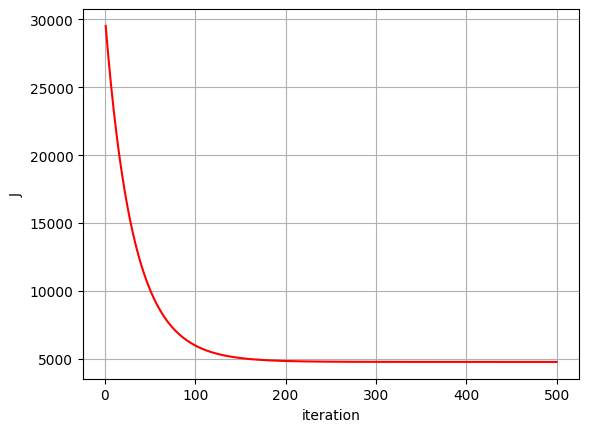

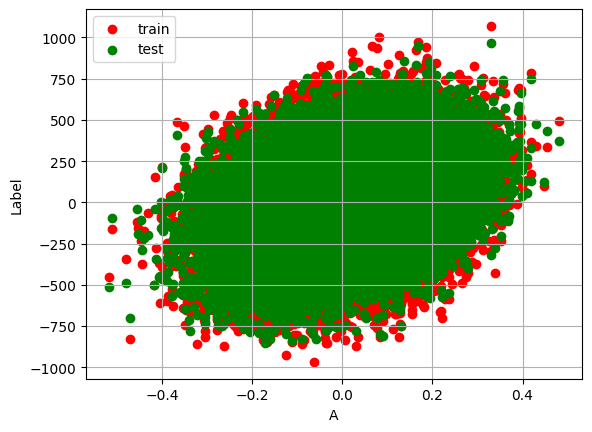

0.8428148765274308
4769.786033253592


<Figure size 640x480 with 0 Axes>

In [22]:
model=linear_regressor(x,y)
model.gradient_descent(1,500)
model.graph()
model.score()

In [23]:
ids=np.array(data_test["ids"])
x_test=np.array(data_test[data_test.columns[1:]])

In [13]:
y_predicted=model.predict(x_test)

In [14]:
data_predicted=pd.DataFrame(columns=["ids","predicted_label"])
data_predicted["ids"]=ids
data_predicted["predicted_label"]=y_predicted
data_predicted.to_csv(r"predicted_linear regression.csv",index=False)

Polynomial Regression

In [31]:
data_train=pd.read_csv(r"polynomial_train.csv")
data_test=pd.read_csv(r"polynomial_test_data.csv")

In [32]:
x=np.array(data_train[["A","B","C"]])
y=np.array(data_train["label"])

In [54]:
m,n=x.shape
x_train=x[0:int(m*0.6),:]
x_dev=x[int(m*0.6):int(m*0.8),:]
x_test=x[int(m*0.8):,:]
y_train=y[0:int(m*0.6)]
y_dev=y[int(m*0.6):int(m*0.8)]
y_test=y[int(m*0.8):]

In [ ]:
point=np.zeros((3,10))
d=2
for i in range(10):
  w,b,j_train=polynomial_regression((poly(normalized(x_train),d)),y_train,1,7000)
  j_dev=np.sum((np.dot((poly(normalized(x_dev),d)),w)+b-y_dev)**2)/(2*x_dev.shape[0])
  point[0,i]=d
  point[1,i]=j_train
  point[2,i]=j_dev
  d=d+1

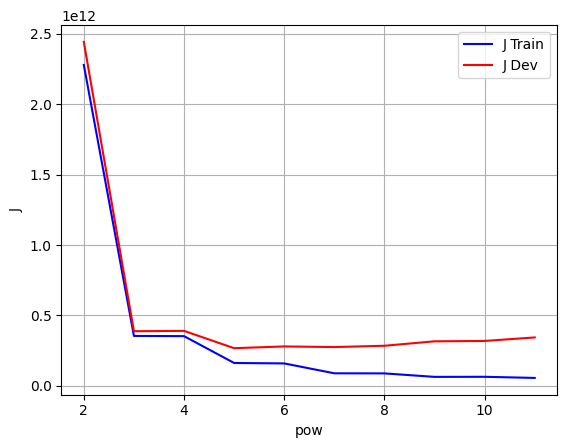

In [38]:
plt.clf()
plt.grid(True)
plt.xlabel("pow")
plt.ylabel("J")
plt.plot(point[0,:],point[1,:],c="b",label="J Train")
plt.plot(point[0,:],point[2,:],c="r",label="J Dev")
plt.legend()
plt.show()

degree=5 is the best choice


In [55]:
x_train_poly=poly(x_train,5)
x_dev_poly=poly(x_dev,5)

In [ ]:
point=np.zeros((3,10))
for i in range(1,11):
        w,b,j_train=polynomial_regression(x_train_poly,y_train,2,7000,i)
        j_dev=np.sum((np.dot(x_dev_poly,w)+b-y_dev)**2)/(2*x_dev.shape[0])
        point[0,i-1]=i
        point[1,i-1]=j_train
        point[2,i-1]=j_dev

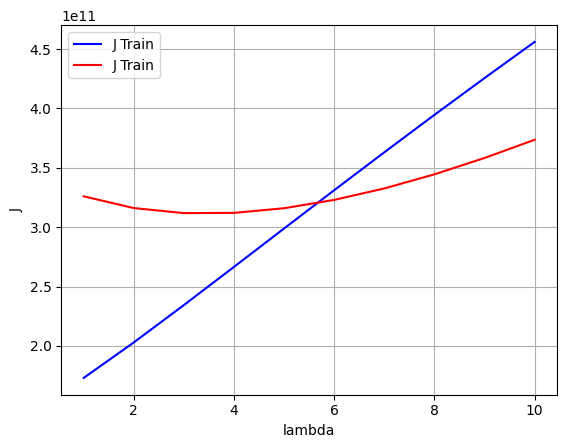

In [41]:
plt.grid("True")
plt.xlabel("lambda")
plt.ylabel("J")
plt.plot(point[0,:],point[1,:],c="b",label="J Train")
plt.plot(point[0,:],point[2,:],c="r",label="J Train")
plt.legend()
plt.show()

Thus best choice for lambda=3

for iteration=0 value of J=3017672264703.4814
for iteration=500 value of J=739604097815.8406
for iteration=1000 value of J=392765290781.53064
for iteration=1500 value of J=292991277033.7913
for iteration=2000 value of J=253906862865.7667
for iteration=2500 value of J=232096180567.9602
for iteration=3000 value of J=216531035324.02768
for iteration=3500 value of J=203951439211.97867
for iteration=4000 value of J=193153927815.16867
for iteration=4500 value of J=183578367849.48932
for iteration=5000 value of J=174915022949.8849
for iteration=5500 value of J=166973326035.02292
for iteration=6000 value of J=159627612335.67108
for iteration=6500 value of J=152790390413.86804


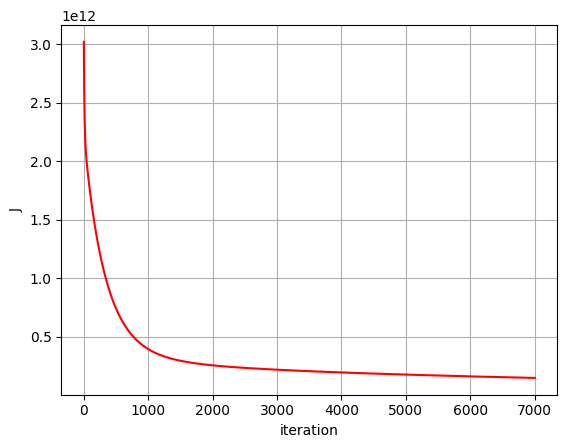

R2= 0.9529066668825266
J= 146410065958.29938


<Figure size 640x480 with 0 Axes>

In [52]:
w,b,j_train=polynomial_regression(x_train_poly,y_train,2,7000)

In [58]:
r2=1-(np.sum((np.dot(poly(normalized(x_test),5),w)+b-y_test)**2)/np.sum((y_test-y_test.mean())**2))
r2adj=1-((1-r2)*(m-1)/(m-n-1))
print(r2adj)

0.9011621415832928


for iteration=0 value of J=3270134231514.8423
for iteration=500 value of J=995962037792.2137
for iteration=1000 value of J=491713869363.08057
for iteration=1500 value of J=299273166641.4662
for iteration=2000 value of J=222547022374.2705
for iteration=2500 value of J=189449548363.7006
for iteration=3000 value of J=173080067184.4763
for iteration=3500 value of J=163282906062.4686
for iteration=4000 value of J=156182686249.45093
for iteration=4500 value of J=150281639154.33774
for iteration=5000 value of J=144989836632.86526
for iteration=5500 value of J=140067310722.74753
for iteration=6000 value of J=135410745588.12196
for iteration=6500 value of J=130971247381.42934
for iteration=7000 value of J=126722300137.31232
for iteration=7500 value of J=122647079249.07037
for iteration=8000 value of J=118733305112.28706
for iteration=8500 value of J=114971075857.69818
for iteration=9000 value of J=111351902512.70534
for iteration=9500 value of J=107868245260.6622
for iteration=10000 value of J=

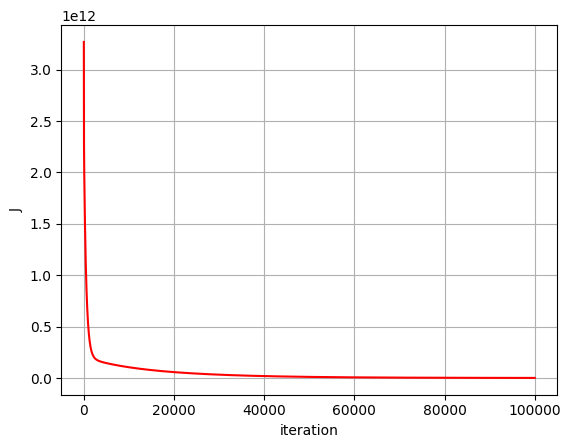

R2= 0.9997774285863529
J= 742111114.813984


<Figure size 640x480 with 0 Axes>

In [47]:
x=normalized(x)
x_poly=(poly(x,5))
w,b,j=polynomial_regression(x_poly,y,2,100000)

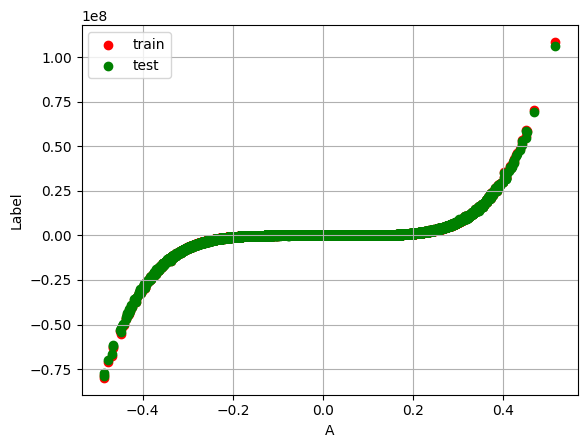

In [48]:
plt.grid(True)
plt.xlabel("A")
plt.ylabel("Label")
plt.scatter(x[:,0],y,c="red")
plt.scatter(x[:,0],np.dot(x_poly,w)+b,c="g")
plt.legend(["train", "test"])


In [49]:
x_test=np.array(data_test[["A","B","C"]])
x_test=normalized(x_test)
x_test=poly(x_test,5)

In [50]:
y_pred=np.dot(x_test,w)+b

In [51]:
data_pred=pd.DataFrame(columns=["ids","label"])
data_pred["ids"]=data_test["ids"]
data_pred["label"]=y_pred
data_pred.to_csv(r"predicted_polynomial regression.csv",index=False)

Logistics regession


In [3]:
data_train=pd.read_csv(r"classification_train.csv")
data_test=pd.read_csv(r"classification_test.csv")
x=np.array(data_train[data_train.columns[2:]])
y=np.array(data_train[data_train.columns[1]])

classification data


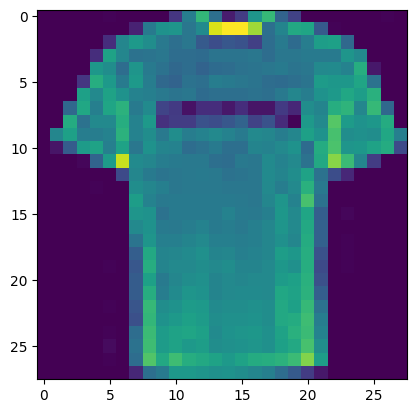

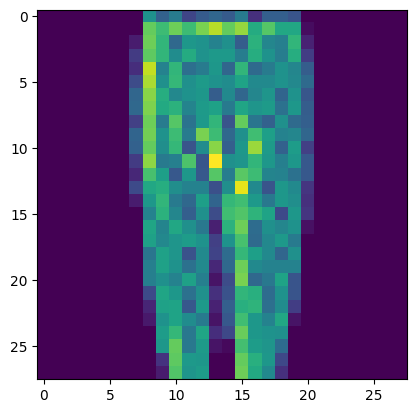

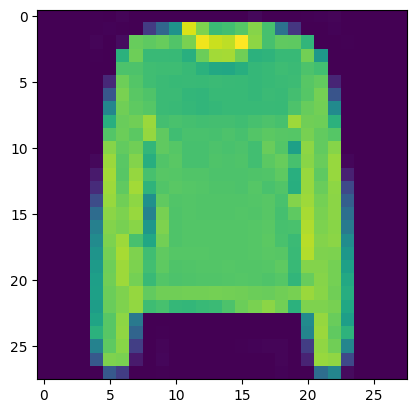

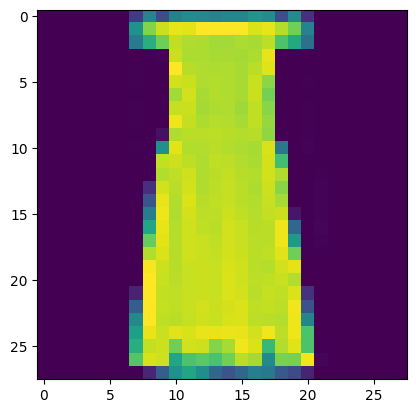

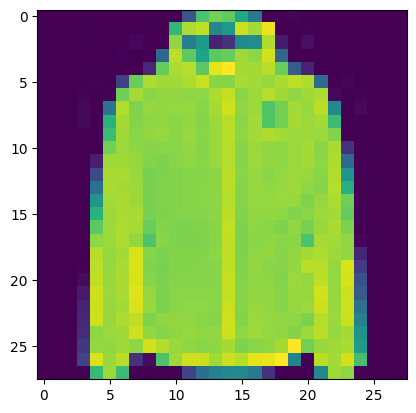

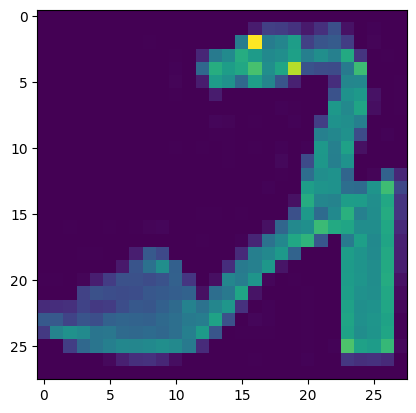

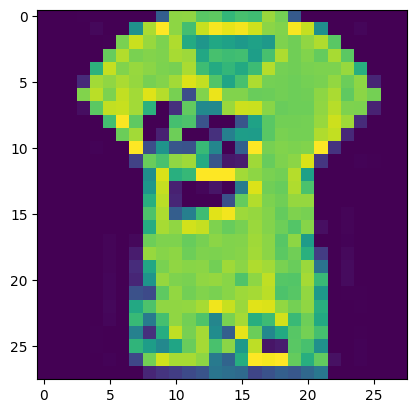

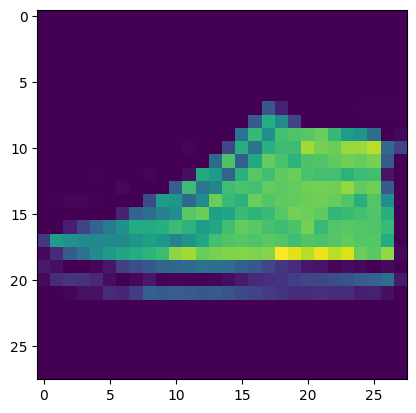

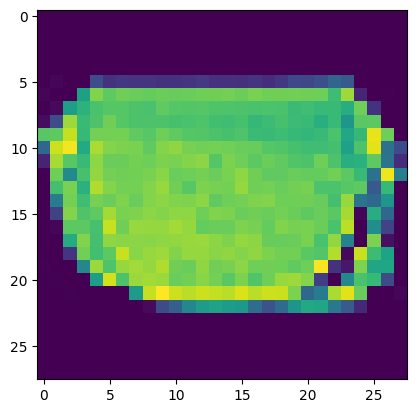

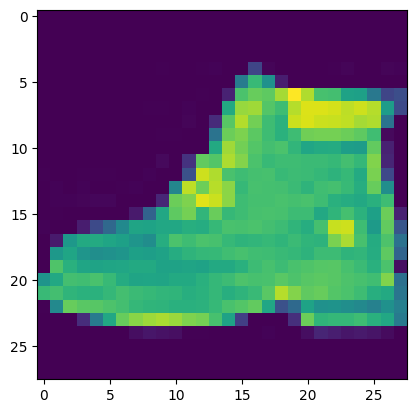

In [4]:
for i in [11,2,4,17,7,36,29999,13,19,10]:
  plt.imshow(x[i].reshape(28,28))
  plt.show()

In [3]:
m,n=x.shape
x_train=x[0:int(m*0.8),:]
x_dev=x[int(m*0.8):,:]
y_train=y[0:int(m*0.8)]
y_dev=y[int(m*0.8):]
x_train=normalized(x_train)
x_dev=normalized(x_dev)

for iteration=1 value of J=6.191947977224742
for iteration=51 value of J=1.1221736043158403
for iteration=101 value of J=1.0102254991715292
for iteration=151 value of J=0.95946188512948
for iteration=201 value of J=0.9286066421021094
for iteration=251 value of J=0.9070979126346544
for iteration=301 value of J=0.890863958753162
for iteration=351 value of J=0.8779602390951018
for iteration=401 value of J=0.8673248520942745
for iteration=451 value of J=0.8583217430897927
for iteration=501 value of J=0.8505431711704631
for iteration=551 value of J=0.8437137617159943


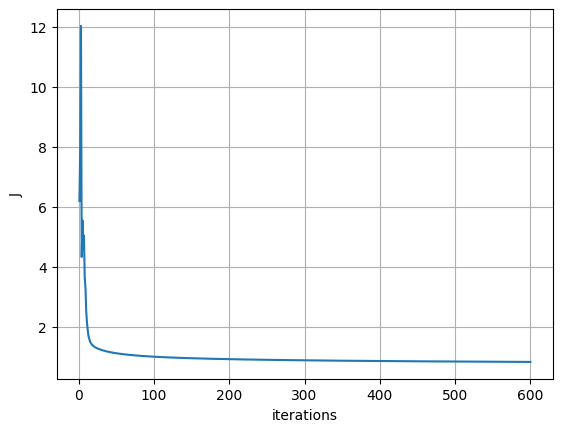

J= 0.8377547274648147


In [4]:
w,b=logistic_regression((x_train),y_train,1,600)

In [5]:
accuracy(x_dev,w,b,y_dev)

84.01666666666667


for iteration=1 value of J=6.19563404064304
for iteration=51 value of J=1.1222814357558053
for iteration=101 value of J=1.0118181699528124
for iteration=151 value of J=0.9621179115309002
for iteration=201 value of J=0.9320844727610187
for iteration=251 value of J=0.9112465502798864
for iteration=301 value of J=0.8955817383882844
for iteration=351 value of J=0.8831747623164341
for iteration=401 value of J=0.8729821527144102
for iteration=451 value of J=0.8643800161886266
for iteration=501 value of J=0.8569689628731959
for iteration=551 value of J=0.8504795635178122


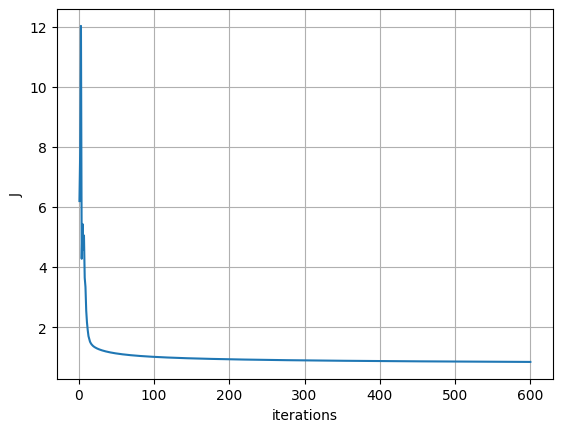

J= 0.8448312716056228


In [7]:
w,b=logistic_regression(normalized(x),y,1,600)

In [8]:
x_test=normalized(np.array(data_test[data_test.columns[1:]]))
z=np.matmul(x_test,w.T)+b
f_w_b=1/(1+np.exp(-z))
y_pred=np.argmax(f_w_b,axis=1)

In [10]:
data_pred=pd.DataFrame(columns=["ids","label"])
data_pred["ids"]=data_test["ids"]
data_pred["label"]=y_pred

In [11]:
data_pred.to_csv(r"predicted_logistic regression.csv",index=False)

KNN

In [2]:
data_train=pd.read_csv(r"classification_train.csv")
data_test=pd.read_csv(r"classification_test.csv")

In [3]:
x=np.array(data_train[data_train.columns[2:]])
y=np.array(data_train[data_train.columns[1]])
x_test=np.array(data_test[data_test.columns[1:]])

In [4]:
m,n=x.shape
x_train=x[0:int(m*0.8),:]
x_dev=x[int(m*0.8):,:]
y_train=y[0:int(m*0.8)]
y_dev=y[int(m*0.8):]
x_train=normalized(x_train)
x_dev=normalized(x_dev)

In [5]:
model=KNN(x_train,y_train)
ypred=model.predict(x_dev)

In [7]:
accuracy_knn(ypred,y_dev)

81.01666666666667


In [8]:
x=np.array(data_train[data_train.columns[2:]])
y=np.array(data_train[data_train.columns[1]])
x_test=np.array(data_test[data_test.columns[1:]])
x=normalized(x)
x_test=normalized(x_test)

In [9]:
model=KNN(x,y)
y_pred=model.predict(x_test)

In [10]:
data_pred=pd.DataFrame(columns=["ids","label"])
data_pred["ids"]=data_test["ids"]
data_pred["label"]=y_pred

In [11]:
data_pred.to_csv(r"predicted_KNN regression.csv",index=False)